# Crop and Fertilizer Recommendation System Using ML


In [24]:
#Importing Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
#Looading the dataset
crop = pd.read_csv("Dataset/Crop_recommendation.csv")

In [3]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [6]:
crop.shape

(2200, 8)

In [7]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [8]:
#to check  the missing values
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
crop.duplicated().sum()

0

In [10]:
crop.drop_duplicates(inplace=True)

In [11]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [12]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [13]:
#check the target feature distribution
crop['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [14]:
crop.iloc[0]

N                      90
P                      42
K                      43
temperature     20.879744
humidity        82.002744
ph               6.502985
rainfall       202.935536
label                rice
Name: 0, dtype: object

In [15]:
crop.select_dtypes(include=['int64','float64'])

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [16]:
crop.sort_values('temperature')

,N,P,K,temperature,humidity,ph,rainfall,label
1214,32,141,204,8.825675,82.897537,5.536646,67.235765,grapes
1211,27,145,205,9.467960,82.293355,5.800243,66.027652,grapes
1293,32,138,197,9.535586,80.731127,5.908724,69.441152,grapes
1291,14,121,203,9.724458,83.747656,6.158689,74.464111,grapes
1295,23,138,200,9.851243,80.226317,5.965379,68.428024,grapes
...,...,...,...,...,...,...,...,...
1766,63,58,50,43.037143,94.642890,6.720744,41.585659,papaya
1750,37,52,47,43.080227,93.903057,6.542777,211.852906,papaya
1722,61,64,52,43.302049,92.834054,6.641099,110.562229,papaya
1761,59,62,49,43.360515,93.351916,6.941497,114.778071,papaya


In [17]:
# Identify numerical features
numerical_features = crop.drop('label', axis=1)

In [18]:
# Check for outliers using boxplots and remove extreme values
Q1 = numerical_features.quantile(0.25)
Q3 = numerical_features.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [19]:
# Filtering outliers
crop = crop[~((numerical_features < lower_bound) | (numerical_features > upper_bound)).any(axis=1)]

In [20]:
# Feature selection using SelectKBest
X = crop.drop('label', axis=1)
y = crop['label']  # Keeping labels as they are (without encoding)

In [25]:
selector = SelectKBest(score_func=f_classif, k=5)  # Select top 5 features
X_selected = selector.fit_transform(X, y)

In [26]:
# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", list(selected_features))

Selected Features: ['N', 'P', 'K', 'humidity', 'rainfall']


In [30]:
features = crop.columns.to_list()
features.remove('label')
print(features)

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


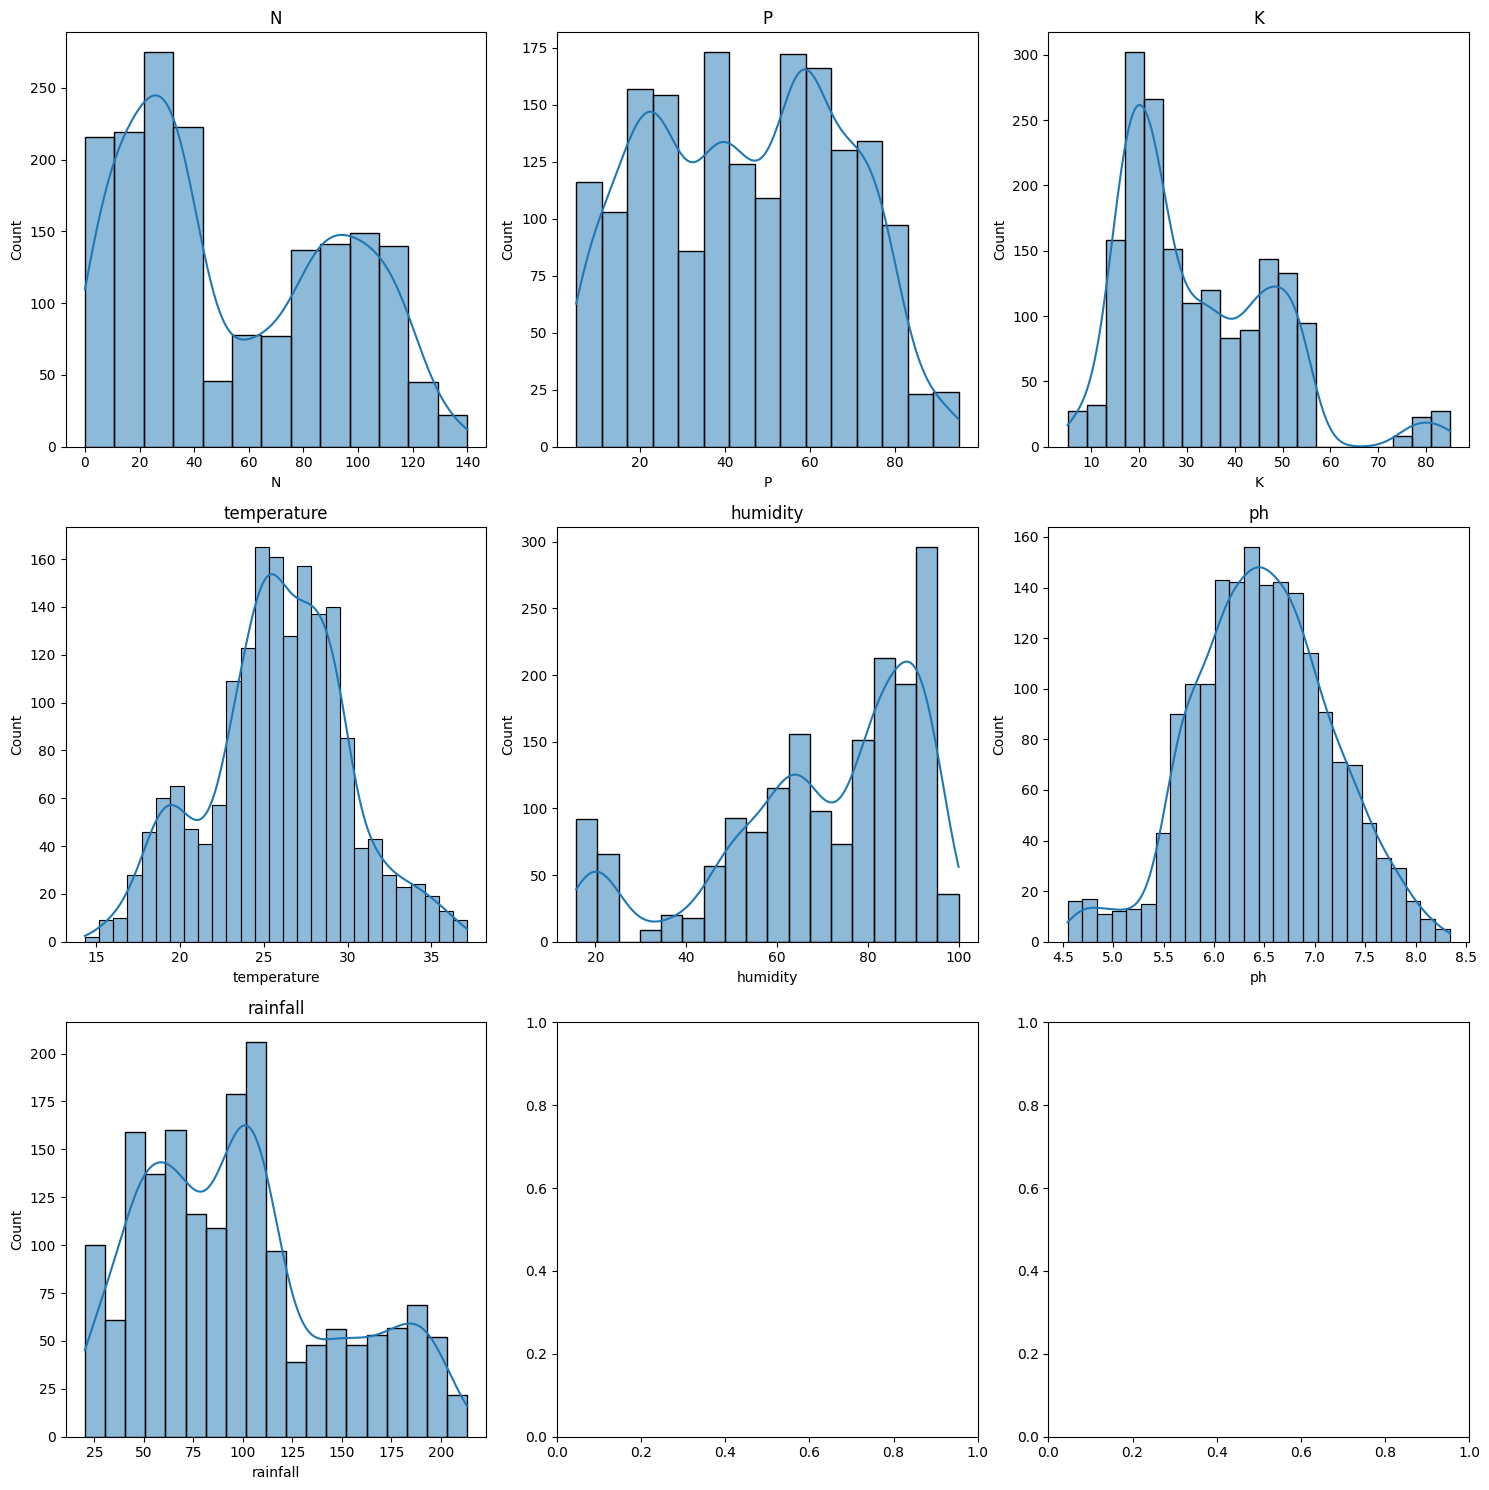

In [31]:
#Visualize the distribution of each feature

fig, ax = plt.subplots(3, 3, figsize=(15, 15))

for i, subplot in zip(features, ax.flatten()):
    sns.histplot(crop[i], ax=subplot, kde=True)
    subplot.set_title(i)
plt.tight_layout()
plt.show()

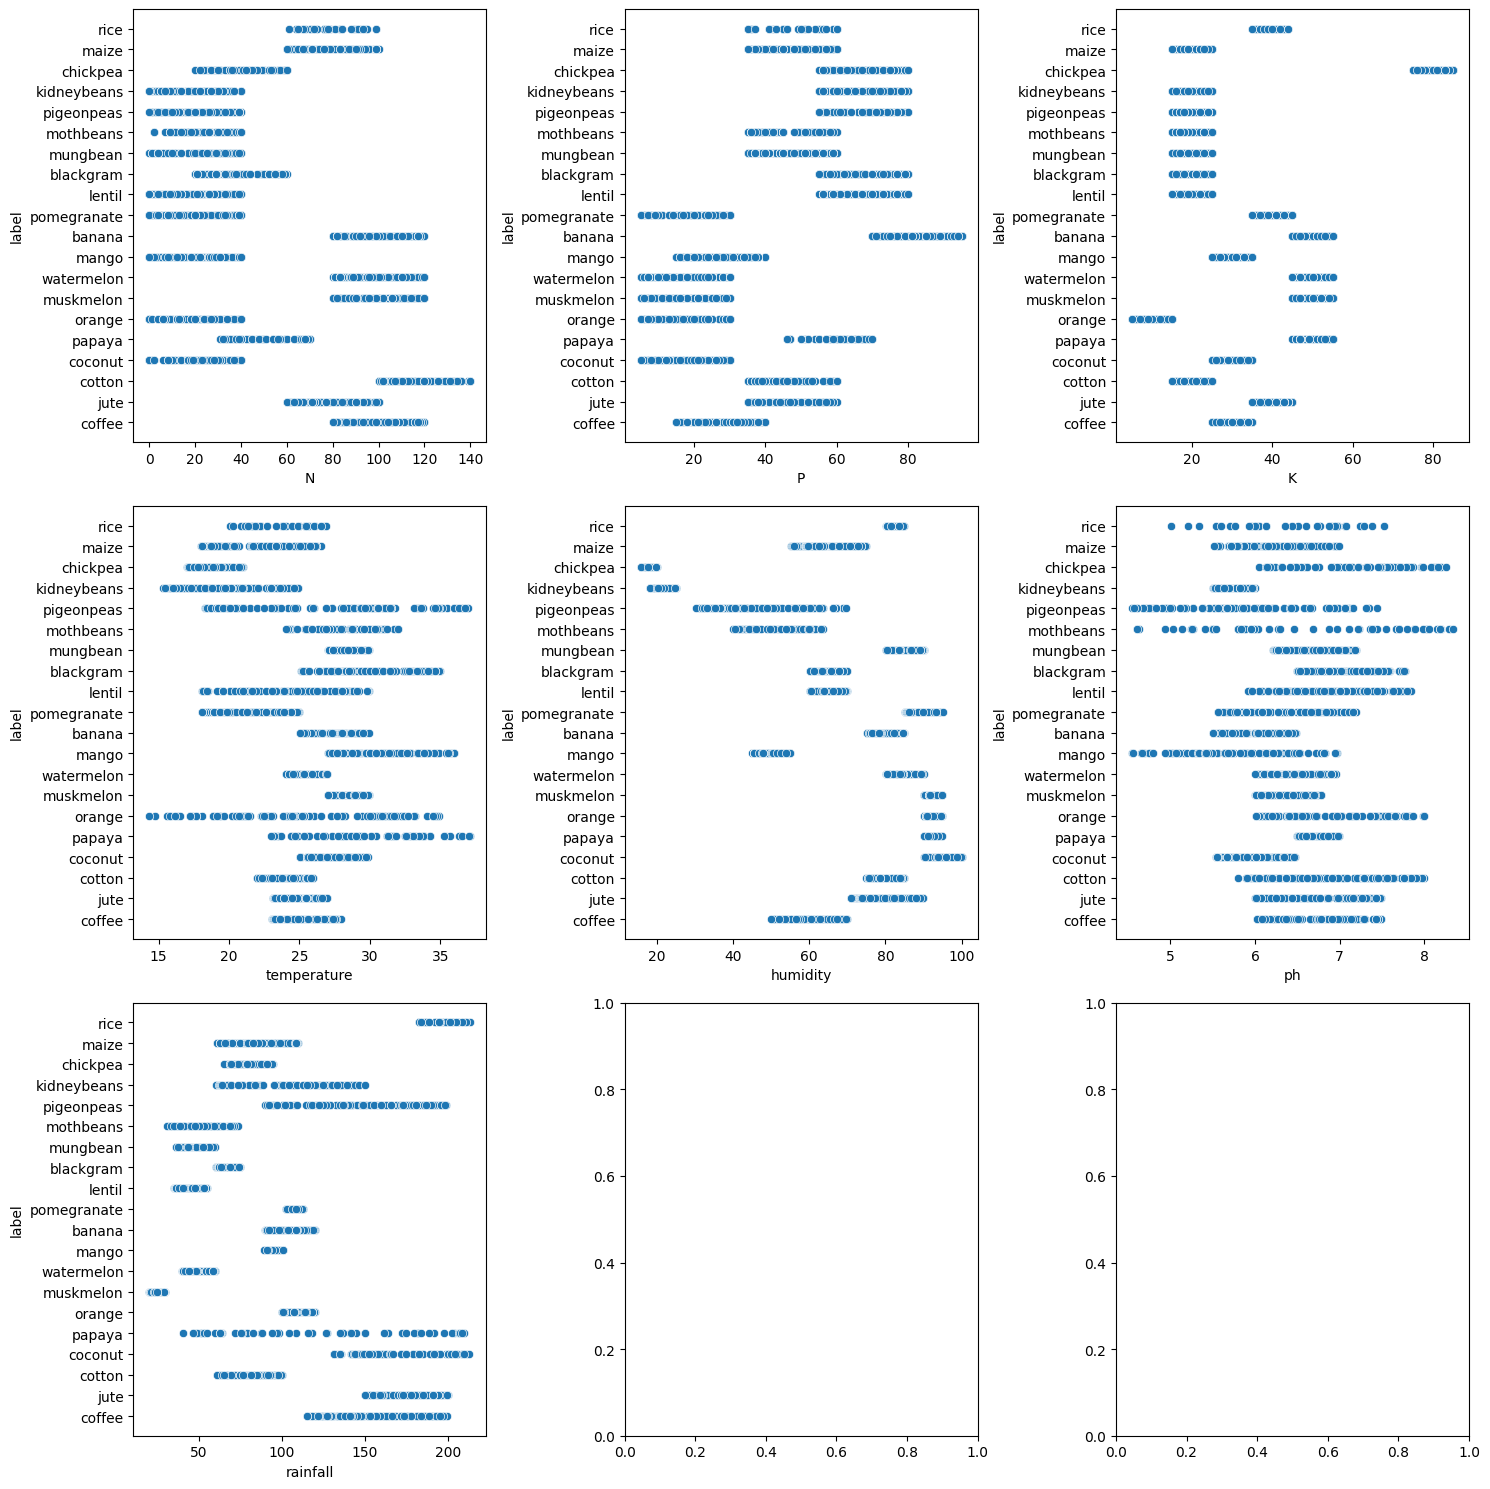

In [32]:
#ploting scatter plot
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i, subplot in zip(features, ax.flatten()):
    sns.scatterplot(x=i, y='label', data=crop, ax=subplot)
plt.tight_layout()
plt.show()

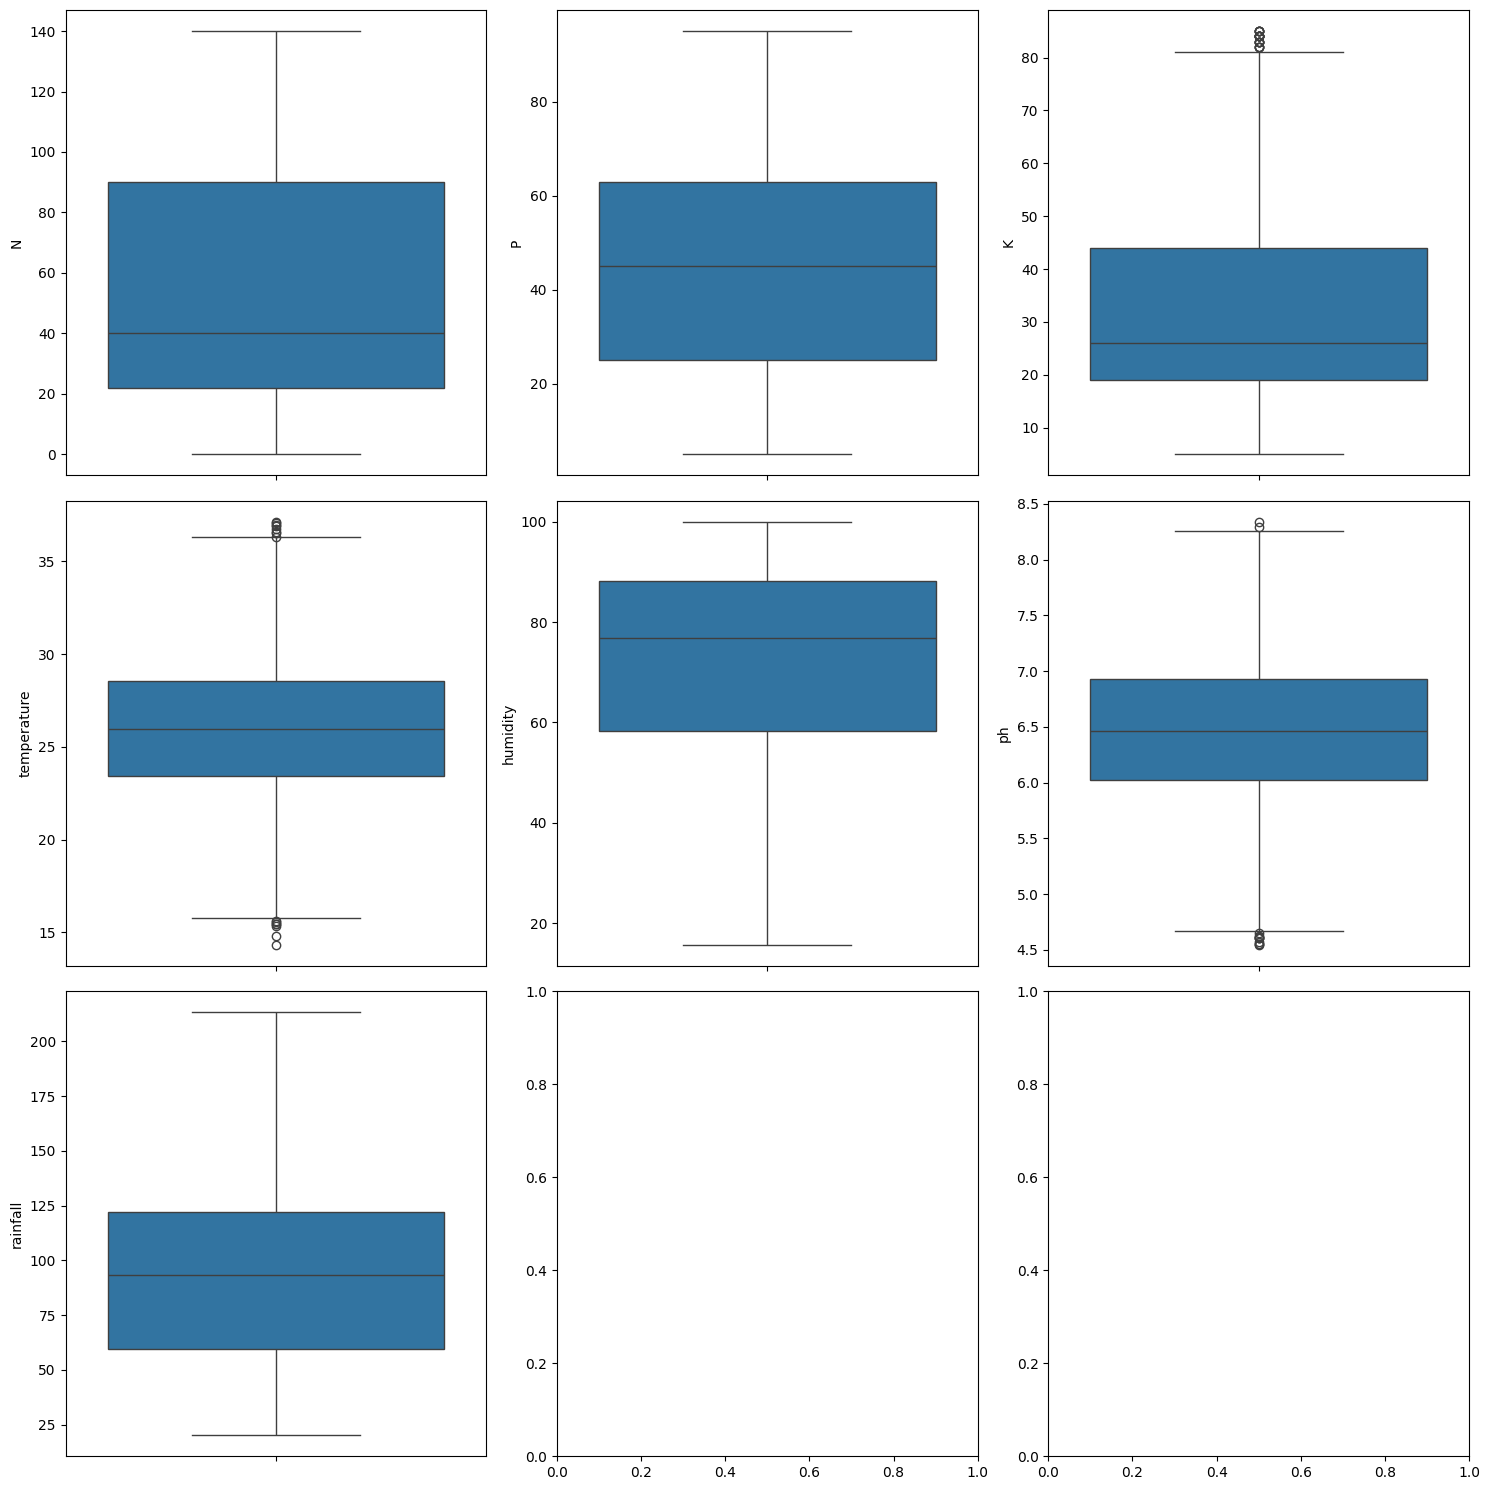

In [33]:
#Finding outliers - boxplot
fig, ax = plt.subplots(3, 3, figsize=(15,15))
for i, subplot in zip(features, ax.flatten()):
    sns.boxplot(crop[i],ax= subplot)
plt.tight_layout()
plt.show()

In [34]:
#correlation of the features
num_cols= crop.select_dtypes(include=[np.number])
num_cols

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
13,93,56,36,24.014976,82.056872,6.984354,185.277339
14,94,50,37,25.665852,80.663850,6.948020,209.586971
17,91,35,39,23.793920,80.418180,6.970860,206.261186
20,89,45,36,21.325042,80.474764,6.442475,185.497473
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [35]:
corr = num_cols.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.084996,0.343172,-0.022925,0.263791,0.091578,-0.021797
P,-0.084996,1.000000,-0.052944,-0.068690,-0.470329,-0.003966,-0.017827
K,0.343172,-0.052944,1.000000,-0.084430,0.059263,0.010826,-0.020435
temperature,-0.022925,-0.068690,-0.084430,1.000000,0.247642,-0.030254,-0.093072
humidity,0.263791,-0.470329,0.059263,0.247642,1.000000,0.138226,-0.030023
ph,0.091578,-0.003966,0.010826,-0.030254,0.138226,1.000000,-0.152062
rainfall,-0.021797,-0.017827,-0.020435,-0.093072,-0.030023,-0.152062,1.000000


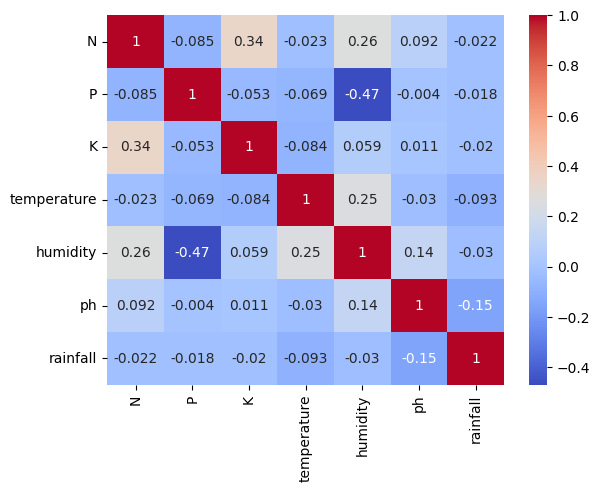

In [36]:
#Visualizing with Heatmap
sns.heatmap(corr, annot = True, cmap='coolwarm')
plt.show()

##Encoding

In [37]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'watermelon', 'muskmelon', 'orange', 'papaya',
       'coconut', 'cotton', 'jute', 'coffee'], dtype=object)

In [38]:
crop_dict = {
    'rice' : 1, 
    'maize' : 2, 'chickpea' : 3, 'kidneybeans' : 4, 'pigeonpeas' : 5,
       'mothbeans' : 6, 'mungbean' : 7, 'blackgram' : 8, 'lentil' : 9, 'pomegranate' : 10,
       'banana' : 11, 'mango' : 12, 'grapes' : 13, 'watermelon' : 14, 'muskmelon' : 15, 'apple' :16,
       'orange':17, 'papaya':18, 'coconut':19, 'cotton':20, 'jute':21, 'coffee':22
}

In [39]:
crop['crop_no'] = crop['label'].map(crop_dict)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_no
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
13,93,56,36,24.014976,82.056872,6.984354,185.277339,rice,1
14,94,50,37,25.665852,80.663850,6.948020,209.586971,rice,1
17,91,35,39,23.793920,80.418180,6.970860,206.261186,rice,1
20,89,45,36,21.325042,80.474764,6.442475,185.497473,rice,1


In [40]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_no
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,22
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,22


In [41]:
crop.drop('label', axis=1,inplace=True)
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,crop_no
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,22
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,22
